In [1]:
import sys
from datetime import timedelta
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

sys.path.append('../src')
from common import common
from common.transform import CameraCalibration
from common.video import Video

# 目視でキャリブレーション用画像を選択する
  times_lst に begin second と end second のリストを登録する

In [ ]:
def get_timedelta(times):
    begin, end = times
    h, m ,s = begin.split(':')
    begin = timedelta(hours=int(h), minutes=int(m), seconds=int(s)).total_seconds()
    h, m ,s = end.split(':')
    end = timedelta(hours=int(h), minutes=int(m), seconds=int(s)).total_seconds()
    return begin, end - begin

times_lst = [
    # begin sec  end sec
    ['00:00:00', '00:00:06'],
    ['00:00:08', '00:00:14'],
    ['00:00:15', '00:00:16'],
    ['00:00:20', '00:00:26'],
    ['00:00:30', '00:00:32'],
    ['00:00:44', '00:00:46'],
    ['00:00:48', '00:01:01'],
]

time_sets = [
    get_timedelta(times) for times in times_lst
]

In [ ]:
video_path = f'{common.data_dir}/calibration/test.mp4'
print(video_path)
video = Video(video_path)

In [ ]:
calib_images = []
for time_set in time_sets:
    begin_sec = time_set[0]
    delta = time_set[1]
    
    video.set_pos_frame(begin_sec)
    frame_len = int(video.fps * delta)
    for _ in range(frame_len):
        frame = video.read()
        if frame is not None:
            calib_images.append(frame)

In [ ]:
plt.imshow(calib_images[79])

In [ ]:
# save images
folder_path = f'{common.data_dir}/calibration/images_raw'
for i, img in tqdm(enumerate(calib_images)):
    path = f'{folder_path}/{i + 1:3d}.jpg'
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(path, img)

# キャリブレーション

In [ ]:
cc = CameraCalibration()
folder_path = f'{common.data_dir}/calibration/images'
cc.fit(folder_path, is_verbose=False)

In [ ]:
json_path = f'{common.data_dir}/calibration/params.json'
cc.to_json(json_path)

In [ ]:
dst = cc.transform(calib_images[79])
plt.imshow(dst)

# 手術室のビデオに適用してみる

In [7]:
video_path_lst = [
    f'{common.root}/video_raw/02_05_Survey_20210903_110000_01.mp4',
    f'{common.root}/video_raw/08_05_Survey_20210915_070700_01.mp4',
    f'{common.root}/video_raw/09_05_Survey_20210706_082000_01.mp4',
]

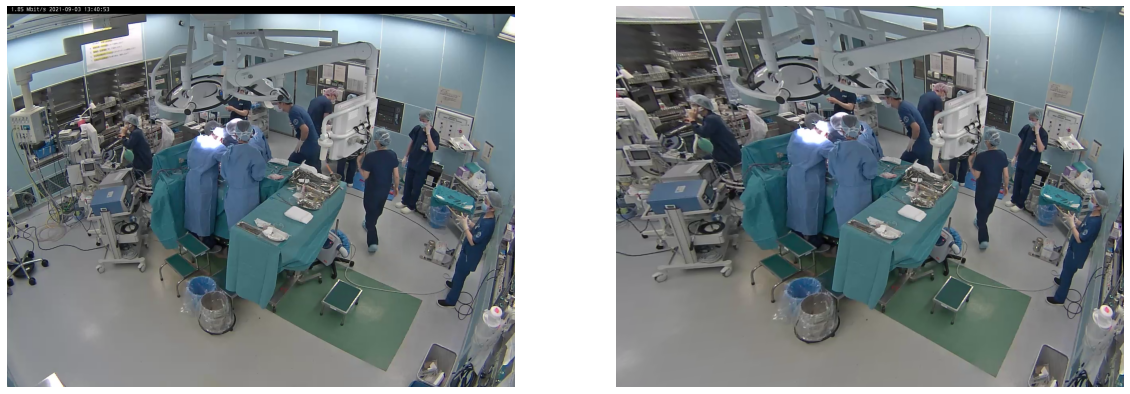

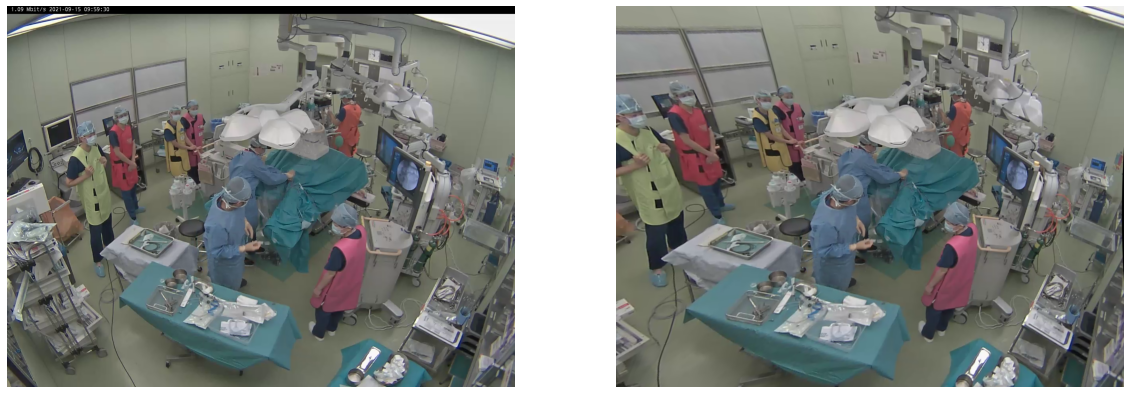

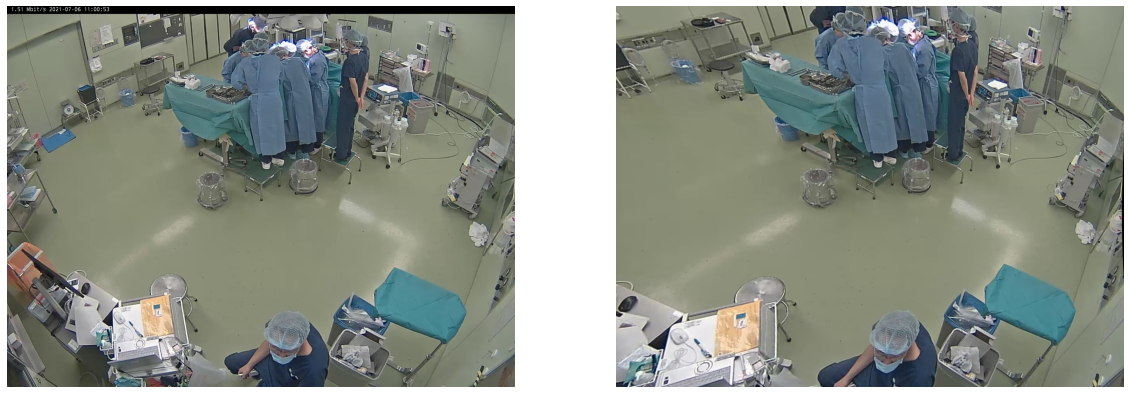

In [13]:
frame_num = 10000
json_path = f'{common.data_dir}/calibration/params.json'
cc = CameraCalibration(json_path)

for path in video_path_lst:
    video = Video(path)
    video.set_pos_frame(frame_num)
    frame = video.read()
    dst = cc.transform(frame, alpha=0.1, is_crop=False)
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(frame)
    ax.axis('off')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(dst)
    ax.axis('off')
    
    plt.show()